In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('sonar.all-data.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


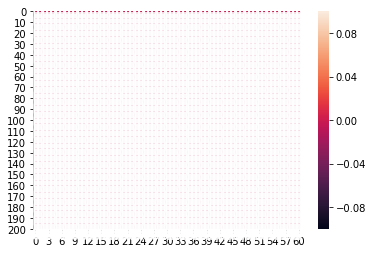

In [3]:
#Lets check wheather the null values are present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),annot=True)
plt.show()

In [4]:
#Lets check the null values without using visualization

data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
#Check the correlation matrix
dfcor=data.corr()
dfcor

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [6]:
#Lets describe the matrix
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


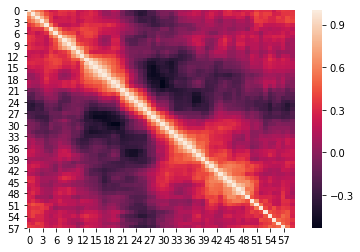

In [7]:
import seaborn as sns
sns.heatmap(dfcor)

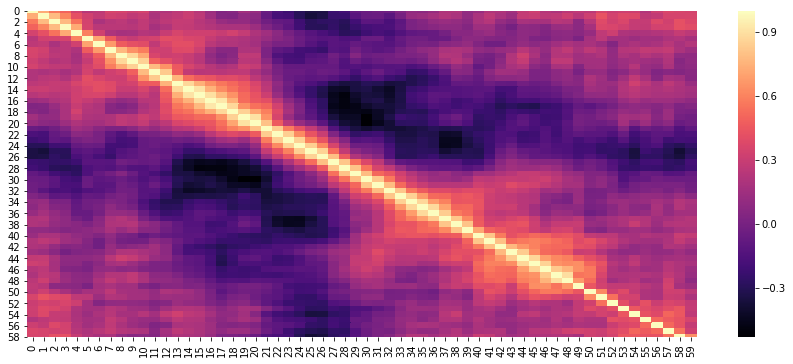

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='magma',annot=False)
plt.show()

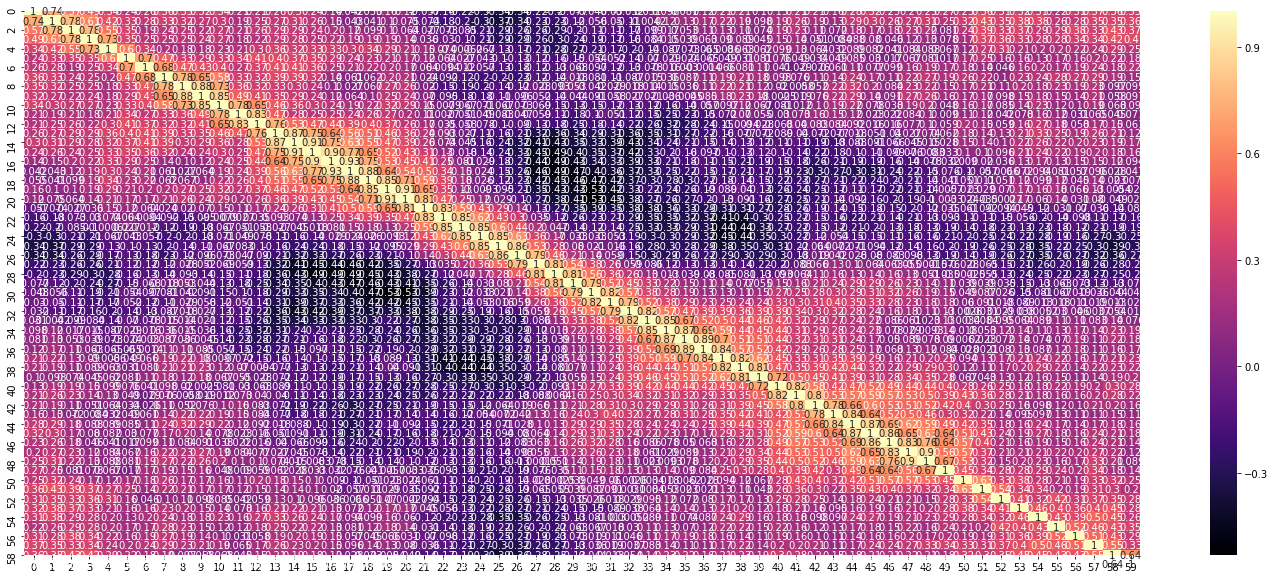

In [9]:
plt.figure(figsize=(25,10))
sns.heatmap(dfcor,cmap='magma',annot=True)
plt.show()

In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [11]:
array = data.values

X = array[:,0:60]
Y = array[:,60]

data1 = Y

In [12]:
le=LabelEncoder()
data1=le.fit_transform(data1)
data1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
Y = data1

In [14]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
data[60]=Y

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [17]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009000000000000001, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018000000000000002, ..., 0.0138, 0.0077,
        0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026000000000000002, 0.0363, 0.0136, ..., 0.0036, 0.0061,
        0.0115]], dtype=object)

In [18]:
from scipy.stats import zscore
z_score = abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(208, 61)
(168, 61)


In [19]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [20]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [21]:
#Lets Again Check the Skewness
data.skew()

0     2.036001
1     1.969917
2     2.344713
3     2.818320
4     1.698684
        ...   
56    1.629182
57    2.058207
58    1.713349
59    2.711412
60    0.135903
Length: 61, dtype: float64

#### Plotting Pairplot through Iteration

#### Plotting Boxplot through Iteration

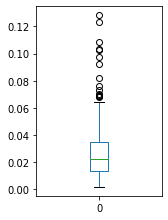

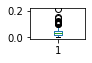

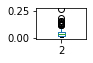

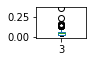

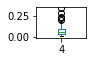

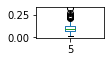

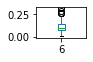

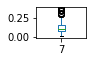

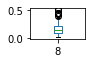

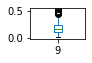

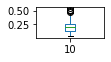

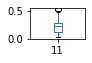

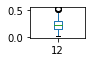

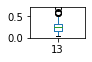

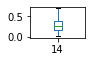

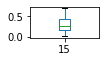

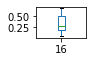

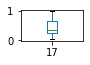

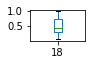

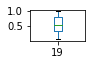

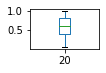

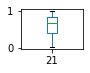

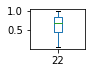

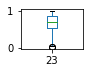

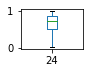

ValueError: num must be 1 <= num <= 25, not 26

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

ValueError: num must be 1 <= num <= 25, not 26

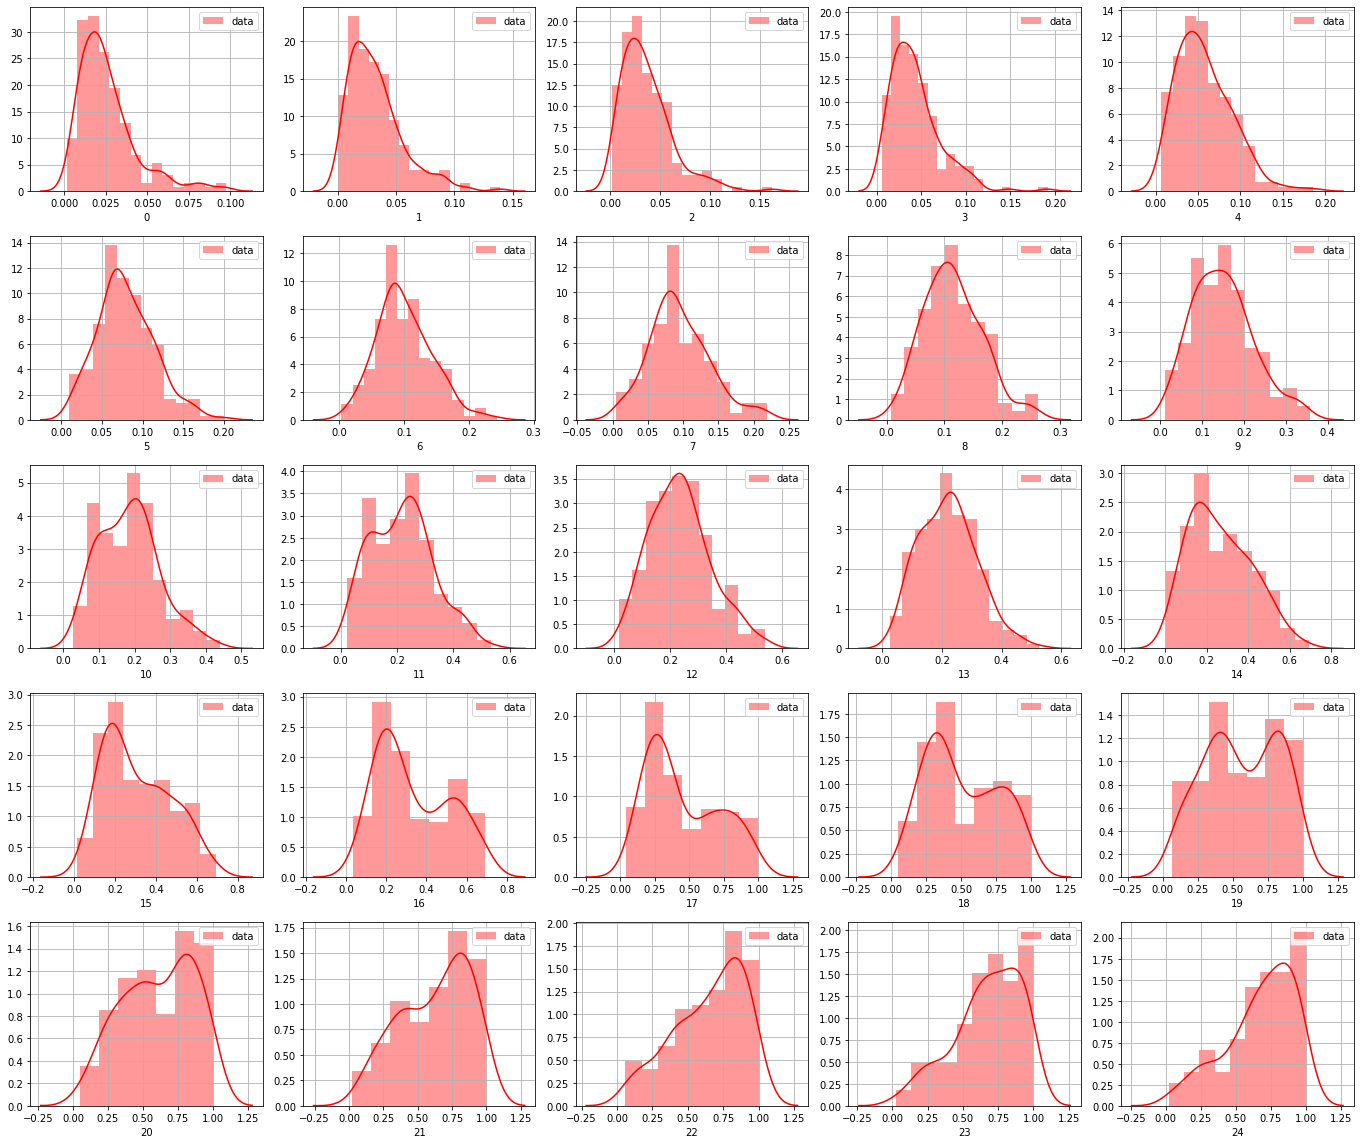

In [46]:
plt.figure(figsize=(19,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Separating Traget and Output Variable

In [23]:
#Separating Traget and Output Variable
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009000000000000001, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018000000000000002, ..., 0.0138, 0.0077,
        0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026000000000000002, 0.0363, 0.0136, ..., 0.0036, 0.0061,
        0.0115]], dtype=object)

In [24]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009000000000000001, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018000000000000002, ..., 0.0138, 0.0077,
        0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026000000000000002, 0.0363, 0.0136, ..., 0.0036, 0.0061,
        0.0115]], dtype=object)

In [25]:
X.shape

(208, 60)

In [26]:
Y.shape

(208,)

In [27]:
Y=Y.reshape(-1,1)

In [28]:
Y.shape

(208, 1)

In [29]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=42)

In [30]:
train_X.shape

(162, 60)

In [31]:
test_X.shape

(46, 60)

In [32]:
train_Y.shape

(162, 1)

In [33]:
test_Y.shape

(46, 1)

In [34]:
lg=LogisticRegression()

In [35]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
pred=lg.predict(test_X)
print(pred)

[0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0]


In [37]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.8913043478260869


In [38]:
print(confusion_matrix(test_Y,pred))

[[25  2]
 [ 3 16]]


In [39]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.89      0.84      0.86        19

    accuracy                           0.89        46
   macro avg       0.89      0.88      0.89        46
weighted avg       0.89      0.89      0.89        46



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [88]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.6708658008658008


In [89]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.6938217338217338


### Grid Search Cross Validation for Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7777777777777778


In [43]:
lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.8913043478260869


## Boost the Dataset by AdaBoost and GradiantBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

1.0
[0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 1]


0.8043478260869565

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

1.0
[0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 0 1 1]


0.8260869565217391

### Boosting though GradientBoost Regressor By using Parameters

In [46]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))


model_Score: 0.9980874016023384
R2 sq:  0.9980874016023384
Mean squared error: 0.20
Test Variance score: 0.19


### Lets Visualize the Goodness of the Prediction

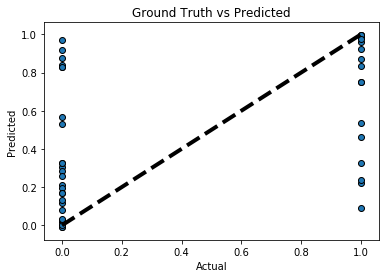

In [48]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [49]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.8260869565217391
[[23  4]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.79      0.79      0.79        19

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



### Multinomial NB by using Crossval Score

In [50]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.53333333 0.53333333 0.86666667 0.8        0.26666667 0.93333333
 0.85714286 0.53846154 0.46153846 0.69230769 0.61538462 0.53846154
 0.53846154 0.61538462 0.69230769]
Mean Scores 0.6321855921855921
Standard deviation 0.1714357650967969
Y Prediction values
[1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1]


array([[71, 40],
       [43, 54]], dtype=int64)

### Pediction using Support Vector Machine 

In [51]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.7391304347826086
[[27  0]
 [12  7]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        27
           1       1.00      0.37      0.54        19

    accuracy                           0.74        46
   macro avg       0.85      0.68      0.68        46
weighted avg       0.82      0.74      0.70        46



### Support Vector Machine by using Crossval Score

In [52]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.60465116 0.57142857 0.56097561 0.63414634 0.31707317]
Mean Scores 0.5376549712340977
Standard Deviation 0.1132606844194984
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1]


0.5384615384615384

### Use GridSearchCV for Support Vector Machine

In [53]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.519, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [54]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [55]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.90      0.95      0.92        19

    accuracy                           0.93        46
   macro avg       0.93      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46



### Prediction Using DecisionTreeClassifier

In [56]:
#DecisionTreeClassifier(criteration='gini')
#DecisionTreeClassifier(criteration='entropy')
#Gini and entropy

dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.6521739130434783
[[16 11]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        27
           1       0.56      0.74      0.64        19

    accuracy                           0.65        46
   macro avg       0.66      0.66      0.65        46
weighted avg       0.68      0.65      0.65        46



### DecisionTreeClassifier by using Crossval Score

In [57]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.45449531 0.61556064 0.58437686 0.75595238 0.67460317]
Mean Scores 0.6169976742745241
Standard Deviation 0.10009995444845285
Y Prediction values
[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


array([[68, 43],
       [37, 60]], dtype=int64)

### Use GridSearchCV for DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    2.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [59]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 2, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [60]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.65      0.68      0.67        19

    accuracy                           0.72        46
   macro avg       0.71      0.71      0.71        46
weighted avg       0.72      0.72      0.72        46



### Boost Decision Tree Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [62]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1])

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.9130434782608695


In [64]:
confusion_matrix(test_Y, predictions)

array([[23,  4],
       [ 0, 19]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [65]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.8478260869565217
[[22  5]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.77      0.89      0.83        19

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



### KNN Nearest Neighbor by using Crossval Score 

In [66]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.5        0.85714286 0.80952381 0.52380952 0.66666667 0.42857143
 0.66666667 0.55       0.3        0.7       ]
Mean Scores 0.6002380952380952
Standard Deviation 0.16328004822898556
Y Prediction values
[0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1]
y_pred.shape (208,)


array([[55, 56],
       [43, 54]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.8112990196078431, 0.729436274509804, 0.7846813725490196, 0.7467156862745098, 0.7646813725490196, 0.7036029411764706, 0.7223529411764706, 0.6487254901960784, 0.6734558823529411, 0.6429411764705881, 0.6616911764705882, 0.6558088235294118, 0.6754411764705882, 0.6507107843137255, 0.6754411764705882, 0.6942401960784313, 0.7071568627450981, 0.700857843137255, 0.7255392156862744, 0.6875245098039217, 0.7317892156862744, 0.6883088235294118, 0.6949264705882354, 0.6886764705882353, 0.7012254901960785, 0.6753921568627451, 0.6937254901960784, 0.6811764705882353, 0.6996078431372549, 0.6874754901960785]


In [69]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [70]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [71]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [72]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [73]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [74]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.89      0.84      0.86        19

    accuracy                           0.89        46
   macro avg       0.89      0.88      0.89        46
weighted avg       0.89      0.89      0.89        46



#### Bagging of KNN Nearest Neighbor 

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [76]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [77]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8478260869565217


In [79]:
confusion_matrix(test_Y, predictions)

array([[21,  6],
       [ 1, 18]], dtype=int64)

### Prediction Using RandomForest Classification

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.7391304347826086
[[19  8]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.65      0.79      0.71        19

    accuracy                           0.74        46
   macro avg       0.74      0.75      0.74        46
weighted avg       0.75      0.74      0.74        46



### RandomForestClassifier Using Cross_Val_Score

In [81]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.54545455 0.66666667 0.61904762 0.61904762 0.66666667 0.71428571
 0.76190476 0.85       0.65       0.7       ]
Mean Scores 0.6793073593073593
Standard Deviation 0.07997969936014589
Y Prediction values
[0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1]
y_pred.shape (208,)


array([[76, 35],
       [36, 61]], dtype=int64)

### Use GridSearchCV for Random Forest Classifier

In [82]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [84]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [85]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.71      0.79      0.75        19

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



# Kindly give the Feedback on How to see all the Model in one go. It has been taught in the class But here I appied the same algo in different ways. While I run the program I got Error. Kindly guide me on this.

### NOTE::Here we find Accuracy score of gridsv is more and it is 0.93 so we are going to save that model

In [99]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(gridsv,'sonar.pkl')

['sonar.pkl']